In [1]:
# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
#Data Collection 
#load Data

In [4]:
books=pd.read_csv(r"C:\Users\GURU\Downloads\Books.csv",encoding='latin-1',low_memory=False)
users = pd.read_csv(r"C:\Users\GURU\Downloads\Users.csv",encoding='latin-1', low_memory=False)
ratings = pd.read_csv(r"C:\Users\GURU\Downloads\Ratings.csv",encoding='latin-1', low_memory=False)

In [5]:
#EXplore the datasts

In [6]:
print("Books:\n", books.head())

Books:
          ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://images.ama

In [7]:
print("users:\n",users.head())

users:
    User-ID                            Location   Age
0        1                  nyc, new york, usa   NaN
1        2           stockton, california, usa  18.0
2        3     moscow, yukon territory, russia   NaN
3        4           porto, v.n.gaia, portugal  17.0
4        5  farnborough, hants, united kingdom   NaN


In [8]:
print("Rating:\n",ratings.head())

Rating:
    User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6


In [9]:
print("Books Shape:",books.shape)
print("Users Shape:",users.shape)
print("Rating Shape:",ratings.shape)

Books Shape: (271360, 8)
Users Shape: (278858, 3)
Rating Shape: (1149780, 3)


In [10]:
#Summary Statistics

In [11]:
print("Books Summary:\n",books.describe(include='all'))

Books Summary:
               ISBN      Book-Title      Book-Author Year-Of-Publication  \
count       271360          271360           271358              271360   
unique      271360          242135           102022                 118   
top     0195153448  Selected Poems  Agatha Christie                2002   
freq             1              27              632               17627   

        Publisher                                        Image-URL-S  \
count      271358                                             271360   
unique      16807                                             271044   
top     Harlequin  http://images.amazon.com/images/P/185326119X.0...   
freq         7535                                                  2   

                                              Image-URL-M  \
count                                              271360   
unique                                             271044   
top     http://images.amazon.com/images/P/185326119X.0...   
fre

In [12]:
print("Users Summary:\n",users.describe(include='all'))

Users Summary:
              User-ID                         Location            Age
count   278858.00000                           278858  168096.000000
unique           NaN                            57339            NaN
top              NaN  london, england, united kingdom            NaN
freq             NaN                             2506            NaN
mean    139429.50000                              NaN      34.751434
std      80499.51502                              NaN      14.428097
min          1.00000                              NaN       0.000000
25%      69715.25000                              NaN      24.000000
50%     139429.50000                              NaN      32.000000
75%     209143.75000                              NaN      44.000000
max     278858.00000                              NaN     244.000000


In [13]:
print("Ratings Summary:\n",ratings.describe())

Ratings Summary:
             User-ID   Book-Rating
count  1.149780e+06  1.149780e+06
mean   1.403864e+05  2.866950e+00
std    8.056228e+04  3.854184e+00
min    2.000000e+00  0.000000e+00
25%    7.034500e+04  0.000000e+00
50%    1.410100e+05  0.000000e+00
75%    2.110280e+05  7.000000e+00
max    2.788540e+05  1.000000e+01


In [14]:
#Data Cleaning & Transformation

In [15]:
# Handel the Missing Values

In [16]:
books.dropna(subset=["Book-Title","Book-Author","ISBN"],inplace = True)
users.dropna(subset=["User-ID"], inplace=True)
ratings.dropna(subset=["User-ID","ISBN","Book-Rating"], inplace=True)

In [17]:
#Remove duplicates

In [18]:
books.drop_duplicates(inplace = True)
users.drop_duplicates(inplace =True)
ratings.drop_duplicates(inplace = True)

In [19]:
# Verify cleaning

In [20]:
print("Missing Values (Books):\n",books.isnull().sum())
print("\n\nMissing Values (Users):\n", users.isnull().sum())
print("\n\nMissing Values (Rating):\n", ratings.isnull().sum())

Missing Values (Books):
 ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


Missing Values (Users):
 User-ID          0
Location         0
Age         110762
dtype: int64


Missing Values (Rating):
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [21]:
#Exploratory Data Analysis(EDA)

In [22]:
#top 10 Most rated books

In [23]:
top_books = ratings['ISBN'].value_counts().head(10)
top_books

ISBN
0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
044023722X     647
0679781587     639
0142001740     615
067976402X     614
0671027360     586
Name: count, dtype: int64

In [24]:
top_books_titles = books[books["ISBN"].isin(top_books.index)][["ISBN","Book-Title"]].drop_duplicates()
top_books_titles

,ISBN,Book-Title
26,0971880107,Wild Animus
118,0671027360,Angels &amp; Demons
305,044023722X,A Painted House
356,0142001740,The Secret Life of Bees
408,0316666343,The Lovely Bones: A Novel
522,0312195516,The Red Tent (Bestselling Backlist)
748,0385504209,The Da Vinci Code
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel
1922,067976402X,Snow Falling on Cedars


In [25]:
merged = top_books_titles.merge(top_books.rename("Counts"),left_on="ISBN", right_index = True)
merged

,ISBN,Book-Title,Counts
26,0971880107,Wild Animus,2502
118,0671027360,Angels &amp; Demons,586
305,044023722X,A Painted House,647
356,0142001740,The Secret Life of Bees,615
408,0316666343,The Lovely Bones: A Novel,1295
522,0312195516,The Red Tent (Bestselling Backlist),723
748,0385504209,The Da Vinci Code,883
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,732
1922,067976402X,Snow Falling on Cedars,614


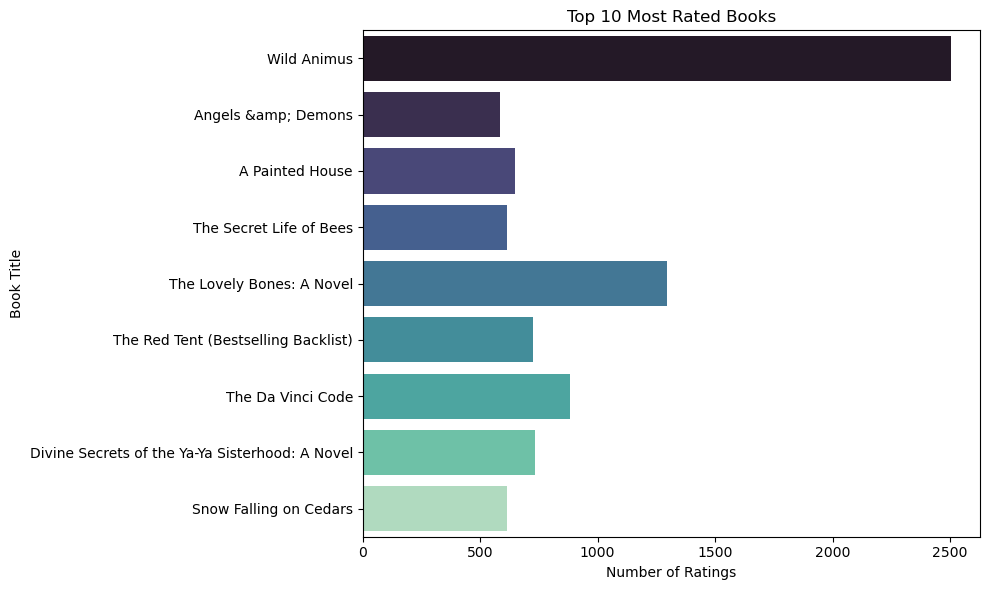

In [26]:
plt.figure(figsize = (10, 6))
sns.barplot(x="Counts", y="Book-Title",data=merged, palette = "mako")
plt.title("Top 10 Most Rated Books")
plt.xlabel("Number of Ratings")
plt.ylabel("Book Title")
plt.tight_layout()
plt.show()

In [27]:
#Rating distribution

C:\Users\GURU\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


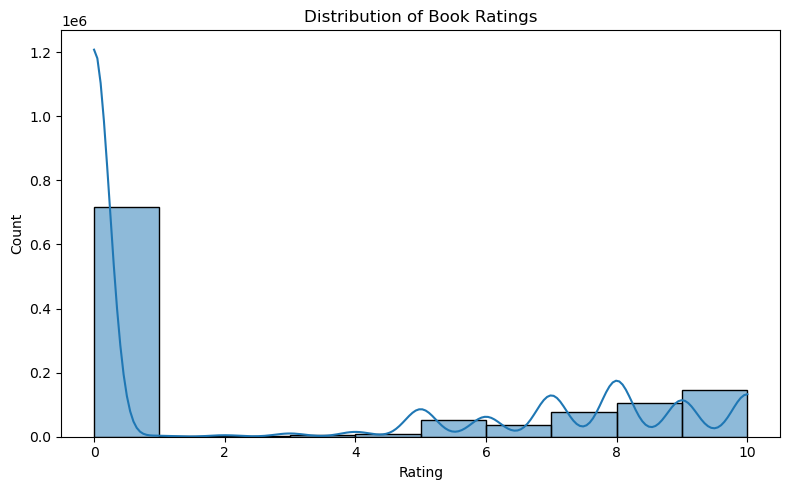

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(ratings["Book-Rating"], bins = 10, kde = True)
plt.title("Distribution of Book Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [29]:
# User Age Distribution 

C:\Users\GURU\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


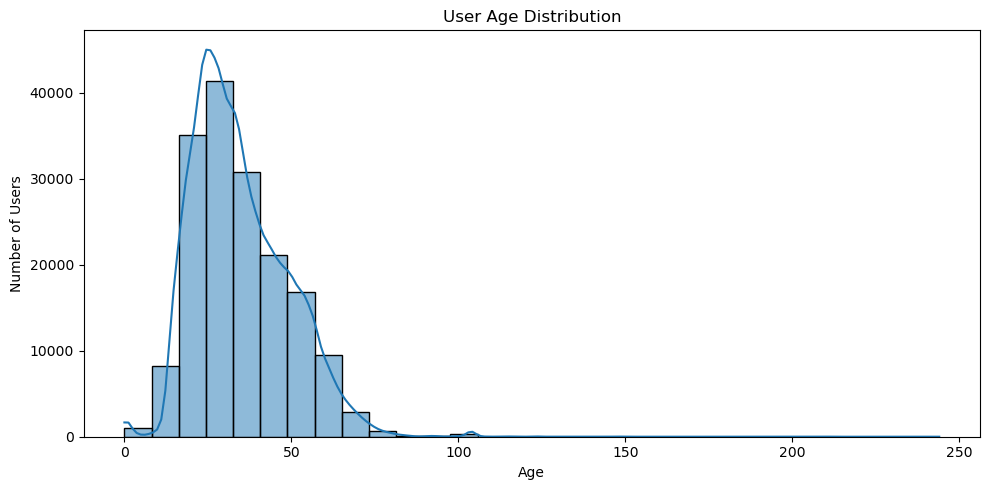

In [30]:
plt.figure(figsize = (10, 5))
sns.histplot(users["Age"].dropna(),bins = 30, kde = True)
plt.title("User Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.tight_layout()
plt.show()

In [31]:
#Feature Selection 
#Merge ratings with book titles

In [32]:
ratings_with_name = ratings.merge(books, on="ISBN")
ratings_with_name

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1031129,276688,0517145553,0,Mostly Harmless,Douglas Adams,1995,Random House Value Pub,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...,http://images.amazon.com/images/P/0517145553.0...
1031130,276688,1575660792,7,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...,http://images.amazon.com/images/P/1575660792.0...
1031131,276690,0590907301,0,Triplet Trouble and the Class Trip (Triplet Tr...,Debbie Dadey,1997,Apple,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...,http://images.amazon.com/images/P/0590907301.0...
1031132,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...,http://images.amazon.com/images/P/0679752714.0...


In [33]:
#filter users rated more than 200 books 

In [34]:
x = ratings_with_name.groupby("User-ID").count()["Book-Rating"] > 200
active_users = x[x].index

In [35]:
filtered_rating = ratings_with_name[ratings_with_name["User-ID"].isin(active_users)]

In [36]:
#Filterd books with at least 50 ratings

In [37]:
y = filtered_rating.groupby("Book-Title").count()["Book-Rating"] >=50
famous_books = y[y].index

In [38]:
final_ratings = filtered_rating[filtered_rating["Book-Title"].isin(famous_books)]

In [39]:
# Model  Development

In [40]:
#Creating Pivot table

In [41]:
pt = final_ratings.pivot_table(index = "Book-Title", columns = "User-ID", values = "Book-Rating")
pt.fillna(0, inplace = True)

In [42]:
# compute cosine similarity

In [43]:
similarity_score = cosine_similarity(pt)

In [44]:
#Evaluation - Recommend Function

In [45]:
def recommend(book_name):
    """Returns top 5 similar books to the given book."""
    try:
        index = np.where(pt.index == book_name)[0][0]
        similar_items = sorted(
            list(enumerate(similarity_score[index])),
            key = lambda x: x[1],
            reverse = True
        )[1:6]
        
        print(f"Recommendations for : {book_name}\n")
        for i in similar_items:
            print(pt.index[i[0]])
    except IndexError:
        print("Book not found in the system or not enough ratings!")

In [46]:
#Example Usage

In [47]:
recommend("1984")

Recommendations for : 1984

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel


In [48]:
recommend("Message in a Bottle")

Recommendations for : Message in a Bottle

Nights in Rodanthe
The Mulberry Tree
A Walk to Remember
River's End
Nightmares &amp; Dreamscapes


# Popularity Based Recommendations 

In [49]:
num_of_rating_df = ratings_with_name.groupby("Book-Title").count()[["Book-Rating"]].reset_index()
num_of_rating_df.rename(columns = {"Book-Rating" : "num_ratings"}, inplace = True)

In [50]:
num_of_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241064,Ã?Â?lpiraten.,2
241065,Ã?Â?rger mit Produkt X. Roman.,4
241066,Ã?Â?sterlich leben.,1
241067,Ã?Â?stlich der Berge.,3


In [54]:
# Extracting country from 'location' column
users['country'] = users['Location'].apply(lambda x: x.split(',')[-1].strip().lower() if isinstance(x, str) else '')

# Identifying what % of customers are coming from different countries
df_location = pd.DataFrame(users['country'].value_counts(normalize=True)).reset_index()
df_location.columns = ['countries', 'value_counts']

In [55]:
# Labeling countries with low customer % as 'other'
df_location['countries'] = df_location.apply(
    lambda x: 'other' if (x['value_counts'] < 0.01 or x['countries'] == '') else x['countries'],
    axis=1
)

In [56]:
# Grouping the customer % from 'other' countries 
df_location = df_location.groupby('countries')['value_counts'].sum().reset_index()

# Convert proportions to percentages
df_location['value_counts'] = df_location['value_counts'] * 100

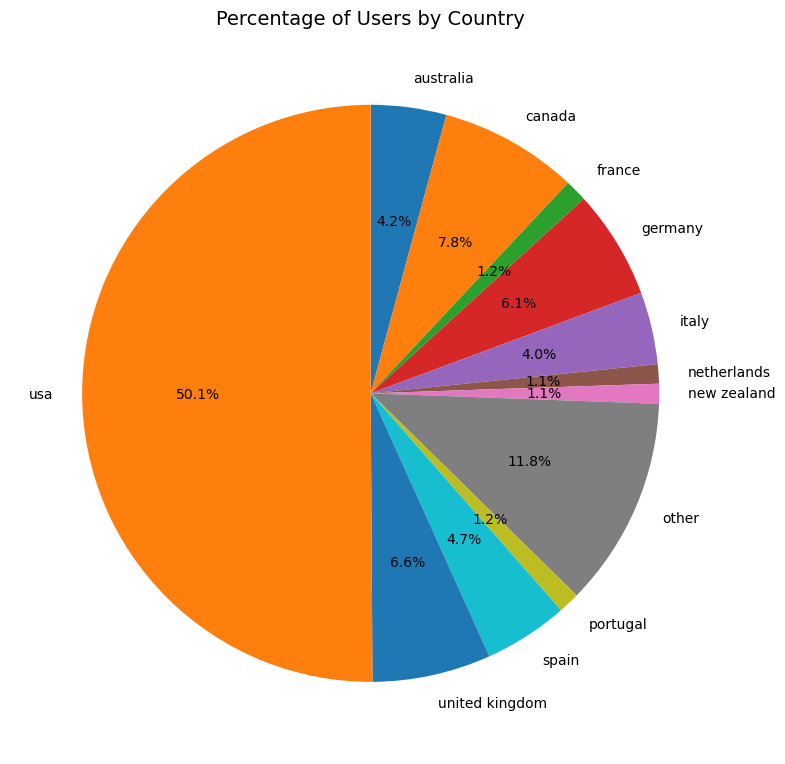

In [57]:
# Pie Chart
plt.figure(figsize=(8,8))
plt.pie(df_location['value_counts'], labels=df_location['countries'], autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Percentage of Users by Country', fontsize=14)
plt.tight_layout()
plt.show()


In [58]:
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]
books.rename(columns = {'Book-Title':'title', 'Book-Author':'author', 'Year-Of-Publication':'year', 'Publisher':'publisher'}, inplace=True)
users.rename(columns = {'User-ID':'user_id', 'Location':'location', 'Age':'age'}, inplace=True)
ratings.rename(columns = {'User-ID':'user_id', 'Book-Rating':'rating'}, inplace=True)
#Now if you see the head of each dataframe you will able to see

In [59]:
ratings['user_id'].value_counts()

user_id
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: count, Length: 105283, dtype: int64

In [60]:
x = ratings['user_id'].value_counts() > 200
y = x[x].index  #user_ids
print(y.shape)
ratings = ratings[ratings['user_id'].isin(y)]

(899,)


In [61]:
rating_with_books = ratings.merge(books, on='ISBN')
rating_with_books.head()

,user_id,ISBN,rating,title,author,year,publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc


In [62]:
number_rating = rating_with_books.groupby('title')['rating'].count().reset_index()
number_rating.rename(columns= {'rating':'number_of_ratings'}, inplace=True)
final_rating = rating_with_books.merge(number_rating, on='title')
final_rating.shape
final_rating = final_rating[final_rating['number_of_ratings'] >= 50]
final_rating.drop_duplicates(['user_id','title'], inplace=True)

In [63]:
book_pivot = final_rating.pivot_table(columns='user_id', index='title', values="rating")
book_pivot.fillna(0, inplace=True)

In [64]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)

In [65]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [66]:
distances, suggestions = model.kneighbors(book_pivot.iloc[237, :].values.reshape(1, -1))
#let us print all the suggested books.

In [67]:
for i in range(len(suggestions)):
  print(book_pivot.index[suggestions[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive'],
      dtype='object', name='title')


In [68]:
print("Books columns:\n", books.columns)
print("Ratings columns:\n", ratings.columns)

Books columns:
 Index(['ISBN', 'title', 'author', 'year', 'publisher'], dtype='object')
Ratings columns:
 Index(['user_id', 'ISBN', 'rating'], dtype='object')


In [69]:
print("Ratings columns:\n", users.columns)

Ratings columns:
 Index(['user_id', 'location', 'age', 'country'], dtype='object')
